## Clasificación - Clustering
Un algoritmo de clustering tiene como objetivo agrupar los objetos de un dataset según su similaridad, de forma que los objetos que hay dentro de un grupo (cluster) sean más similares que aquellos que caen en grupos distintos.

Desde un punto de vista intuitivo, este problema tiene un objetivo muy claro: <b>agrupar adecuadamente un conjunto de datos no etiquetados.

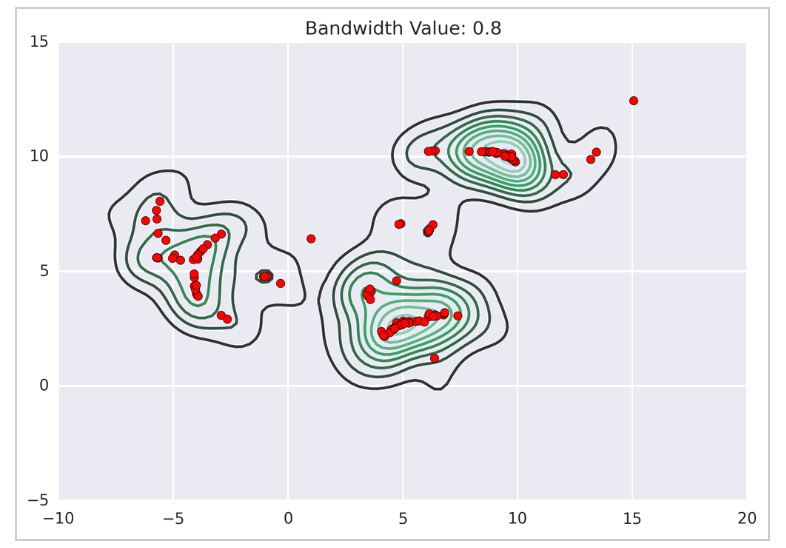

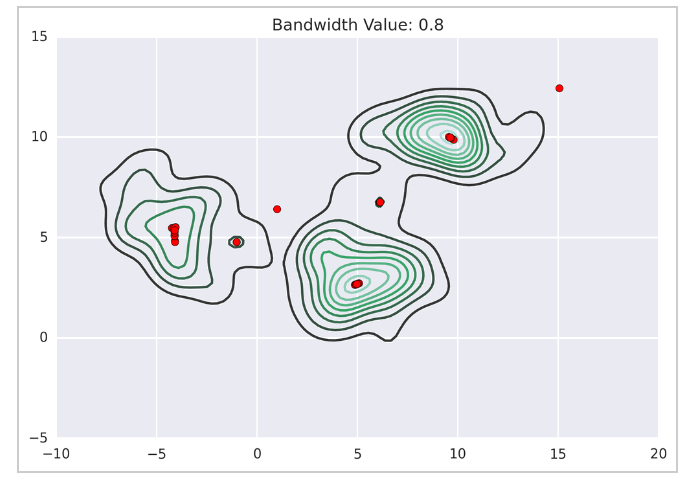

A pesar de su intuición, la noción de "clúster/agrupamiento" no puede ser definido con precisión, esta es una de las causas por las que se ha propuesto un rango tan amplio de algoritmos de clustering.

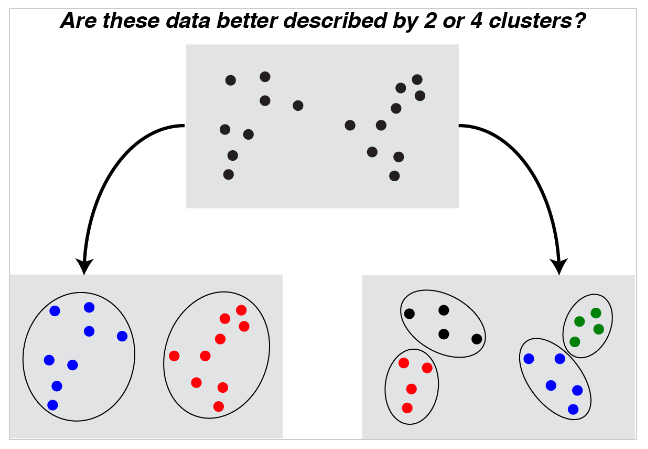

## Axiomatización del Clustering

Normalmente, para poder hablar de similaridad se suele acudir a algún tipo de distancia , con el fin de poder asociar la similitud de los objetos analizados con la distancia que hay entre ellos.

Jon Kleinberg (J. Kleinberg, “An impossibility theorem for clustering” en Proceedings of the 15th International Conference on Neural Information Processing Systems, NIPS’02, pp. 463–470, MIT Press, 2002) propone tres axiomas que destacan las características que debe presentar un problema de agrupamiento y que pueden considerarse buenas, independientemente del algoritmo utilizado para encontrar la solución.

**Invariancia por escala**: Un algoritmo de clustering no debe dar resultados distintos si se aplica una escala al conjunto de puntos.

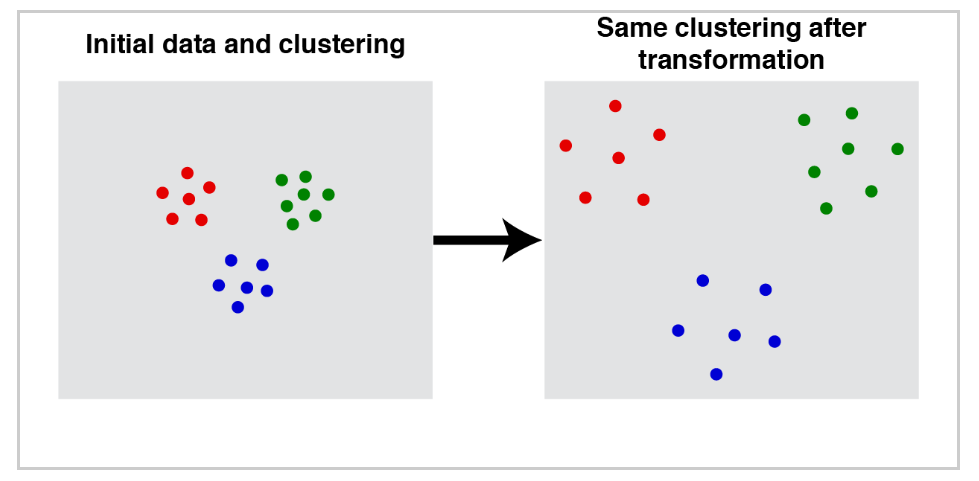

 **Consistencia**: Un algoritmo de clustering no debe dar resultados distintos si las distancias dentro de cada clúster se reducen, o si las distancias entre clusters se aumentan.

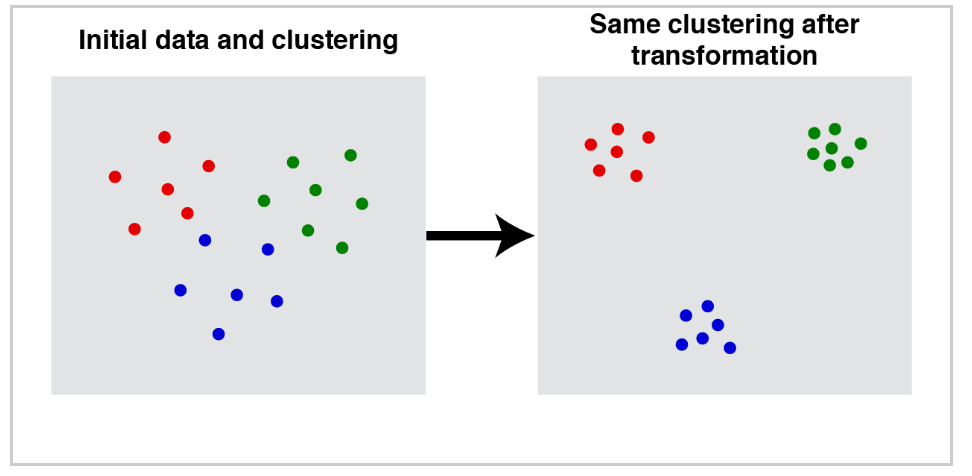

**Riqueza:** La función de agrupación debe ser lo suficientemente flexible como para producir cualquier partición/agrupación arbitraria del conjunto de datos de entrada.
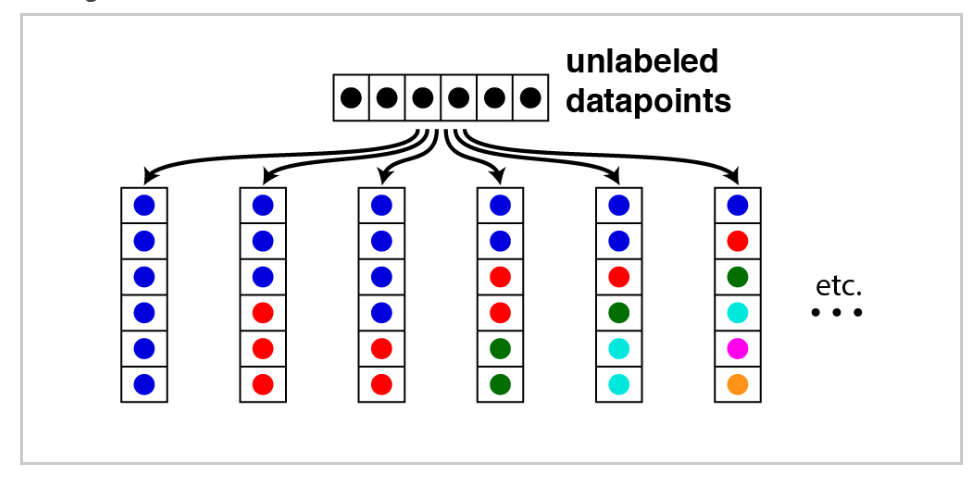

El resultado más interesante del trabajo de Kleinberg es que, pese al claro carácter intuitivo de estos axiomas, **no se puede construir una función de agrupamiento que verifique los tres simultáneamente**.

Y ya que los tres axiomas no pueden verificarse simultáneamente, se pueden diseñar algoritmos de clustering que violan uno de los axiomas mientras se verifican los otros dos.
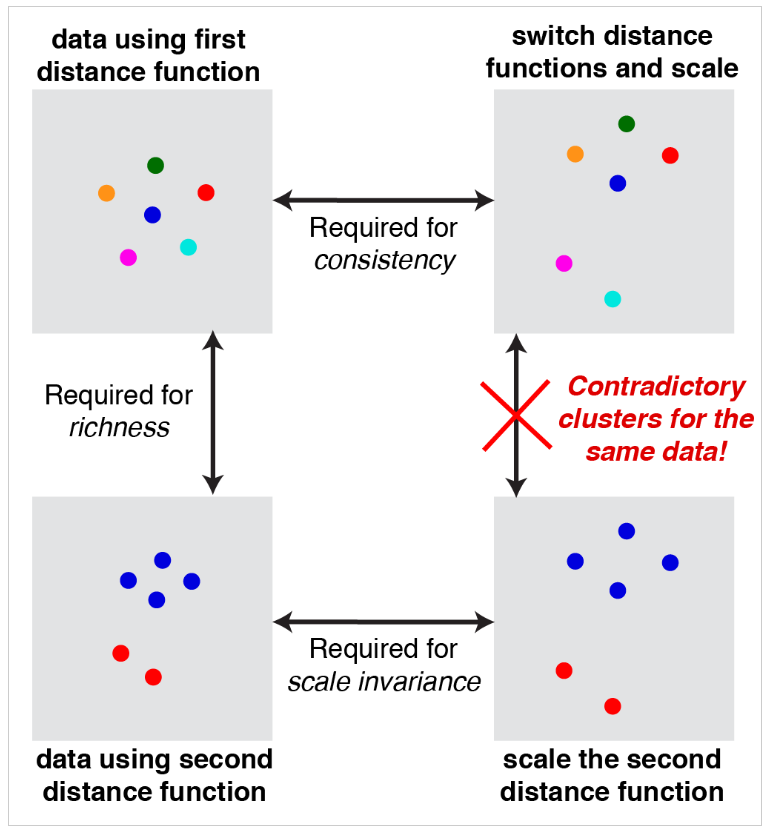

## **K-Means**
La agrupación K Means es un tipo de Aprendizaje no Supervisado, que se utiliza cuando se tienen datos no etiquetados, es decir, datos sin categorías o grupos definidos. El objetivo de este algoritmo es encontrar grupos en los datos, con el número de grupos representados por la variable K.

El algoritmo funciona de manera iterativa para asignar cada punto de datos a uno de los grupos K en función de las características que se proporcionan. Los puntos de datos se agrupan en función de la similitud de las características. Los resultados del algoritmo de agrupamiento K Means son:

Los centroides de los clústeres K, que puedes ser usados para etiquetar nuevos datos.
Etiquetas para los datos de formación, cada punto de datos se asigna a un único clúster.
Cada centroide de un clúster es un conjunto de valores de características que definen los grupos resultantes. El examen de las ponderaciones de las características del centroide puede utilizase para interpretar cualitativamente qué tipo de grupo representa cada conglomerado.

### Cómo trabaja K-Means?

* 1. Inicializar los clústeres centroides, escoger los 3 libros para empezar.
* 2. Asignar los puntos de datos a los clústeres, colocar los libros restantes uno por uno.
* 3. Actualizar los centros de clúster, empezar de nuevo con 3 libros diferentes.
* 4. Repetir el paso 2 y 3 hasta que se cumpla la condición de parada.

### Cómo elegir el K?

El algoritmo K Means encuentra los clústeres y las etiquetas de conjuntos de datos para un K en particular preseleccionado. 

Para encontrar el número de clústeres en los datos, el usuario necesita ejecutar el algoritmo de clústeres K Means para un rango de valores K y comparar los resultados. 

En general, no existe un método para determinar el valor exacto de K, pero se puede obtener una estimación precisa utilizando algunas técnicas.

Una de las métricas que se utiliza comúnmente para comparar los resultados a través de diferentes valores de K es la distancia media entre los puntos de datos y el centroide de su clúster. 
Dado que el aumento del número de clústeres siempre reducirá la distancia a los puntos de datos, el aumento de K es el mismo que el número de puntos de datos. Luego, se traza la distancia media al centroide en función de K y se puede utilizar **el método de codo**, donde la tasa de disminución se desplaza bruscamente, para determinar aproximadamente K.

<img src="k-means_convergence.gif" width="750" align="center">

In [20]:
# EJEMPLO
# Analizaremos un conjunto de datos que contiene información sobre los montos de gasto anual de varios clientes de diversas categorías de productos para la estructura interna.
# Nuestro objetivo es agrupar los datos para que podamos ver los productos que son comprados juntos por los clientes. 
# Por ejemplo, si una persona va a la tienda a comprar algún comestible, es muy probable que también compre “leche”, 
# por lo tanto podemos colocar la “leche” cerca de los comestibles de la tienda;
# de la misma manera es muy poco probable que la misma persona compre las verduras frescas al mismo tiempo.
#### Imports necesarios  ####
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [21]:
data = pd.read_csv('Wholesale customers data.csv')
#Conocer la forma de los datos
data.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [22]:
#Conocer los datos nulos
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [23]:
#Conocer el formato de los datos
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [24]:
### DATOS DE MUESTRA ###
#Se selecionan unos datos al azar para posteriormente verificar el clúster 
#al que pertenecen
indices = [26, 176, 392]
muestras = pd.DataFrame(data.loc[indices], 
                       columns = data.keys()).reset_index(drop = True)

data = data.drop(indices, axis = 0)

In [25]:
muestras

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,9898,961,2861,3151,242,833
1,1,3,45640,6958,6536,7368,1532,230
2,1,3,518,4180,3600,659,122,654


In [26]:
### PROCESAMIENTO DE LOS DATOS ###

#Eliminamos las columnas de región y canal 
data = data.drop(['Region', 'Channel'], axis = 1)
muestras = muestras.drop(['Region', 'Channel'], axis = 1)

In [27]:
#Se realiza el escalamiento de los datos
from sklearn import preprocessing

data_escalada = preprocessing.Normalizer().fit_transform(data)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

In [28]:
data_escalada

array([[0.70833271, 0.53987376, 0.42274083, 0.01196489, 0.14950522,
        0.07480852],
       [0.44219826, 0.61470384, 0.59953989, 0.11040858, 0.20634248,
        0.11128583],
       [0.39655169, 0.5497918 , 0.47963217, 0.15011913, 0.2194673 ,
        0.48961931],
       ...,
       [0.36446153, 0.38846468, 0.7585445 , 0.01096068, 0.37223685,
        0.04682745],
       [0.93773743, 0.1805304 , 0.20340427, 0.09459392, 0.01531   ,
        0.19365326],
       [0.67229603, 0.40960124, 0.60547651, 0.01567967, 0.11506466,
        0.01254374]])

In [1]:
muestras_escalada

NameError: name 'muestras_escalada' is not defined

In [30]:
from sklearn.cluster import KMeans
X = data_escalada.copy()

In [31]:
X

array([[0.70833271, 0.53987376, 0.42274083, 0.01196489, 0.14950522,
        0.07480852],
       [0.44219826, 0.61470384, 0.59953989, 0.11040858, 0.20634248,
        0.11128583],
       [0.39655169, 0.5497918 , 0.47963217, 0.15011913, 0.2194673 ,
        0.48961931],
       ...,
       [0.36446153, 0.38846468, 0.7585445 , 0.01096068, 0.37223685,
        0.04682745],
       [0.93773743, 0.1805304 , 0.20340427, 0.09459392, 0.01531   ,
        0.19365326],
       [0.67229603, 0.40960124, 0.60547651, 0.01567967, 0.11506466,
        0.01254374]])

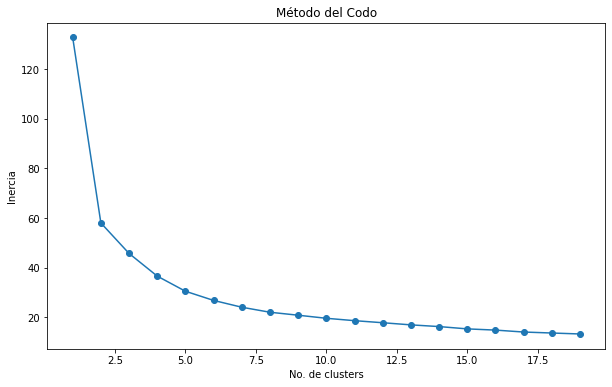

In [34]:

## Hallar el valor óptimo de K ## #Se aplicará el método de codo para hallar K
#Se calcula el algoritmo de agrupación para diferentes valores de K
inercia = [] 
for i in range(1, 20):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++', 
                       max_iter = 300, n_init = 10)
    algoritmo.fit(X)
    #Para cada K, se calcula la suma total del cuadrado dentro del clúster
    inercia.append(algoritmo.inertia_)

#Se traza la curva de la suma de errores cuadráticos 
plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 20)), inercia, marker='o')
plt.show()

In [35]:
## Se aplica el algoritmo de clustering ##
#Se define el algoritmo junto con el valor de K
algoritmo = KMeans(n_clusters = 6, init = 'k-means++', 
                   max_iter = 300, n_init = 10)

In [36]:
#Se entrena el algoritmo
algoritmo.fit(X)

KMeans(n_clusters=6)

In [37]:
#Se obtiene los datos de los centroides y las etiquetas
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

In [38]:
#Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
muestra_prediccion = algoritmo.predict(muestras_escalada)

for i, pred in enumerate(muestra_prediccion):
    print("Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 2
Muestra 1 se encuentra en el clúster: 2
Muestra 2 se encuentra en el clúster: 3


In [40]:
# Se aplica la reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA

modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 

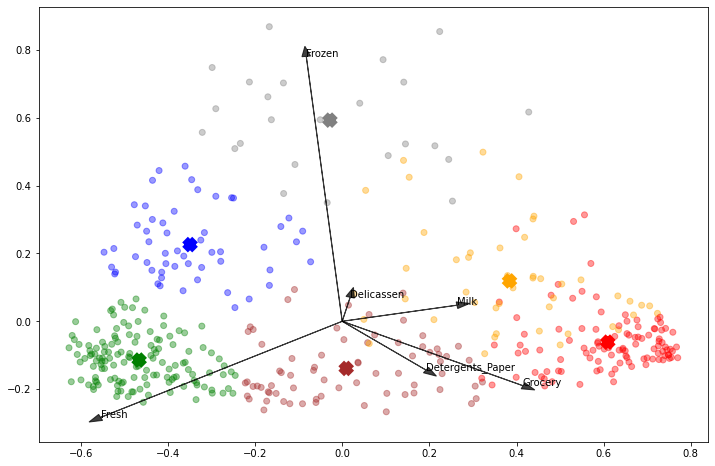

In [55]:
#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

# Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange', 'gray', 'brown']

#Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]
#tamaño del gráfico
plt.rcParams["figure.figsize"] = (12,8)
#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)

#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 8, c = colores)

#Se guardan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data.columns

#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=1)
